In [144]:
# movie of altimeter sampling and adt measurements 
import numpy as np 
import pickle
import xarray as xr
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.animation as ma

x4 = xr.open_dataset('/Users/jakesteinberg/Documents/CPT/bathymetry_gebco_2020/coastlines_global.nc')  

In [4]:
# load obs. 
this_sat = 'j2'
load_sat = pickle.load(open('/Users/jakesteinberg/Documents/CPT/altimetry/' + \
                            this_sat + '_' + 'processed_adt_short.p', 'rb'))
dist = load_sat['dist']
adt = load_sat['adt']
lon_record = load_sat['lon_record']
lat_record = load_sat['lat_record']
track_record = load_sat['track']
time_record = load_sat['time']

In [7]:
time_start = np.nan*np.ones(len(time_record))
for i in range(len(time_record)):
    time_start[i] = np.nanmin(time_record[i])

In [119]:
(time_record[0][1]-time_record[0][0])/(24*60*60)

9.915626425411967

In [123]:
np.cumsum((time_record[i][1:] - time_record[i][0:-1])/(24*60*60))

array([   9.91560714,   19.83165218,   29.74743219,   39.66311271,
         49.57998147,   59.4956557 ,   69.41243726,   79.32869963,
         89.24445913,   99.16005568,  109.07571053,  118.99134507,
        128.9069868 ,  138.82264401,  148.73825765,  158.65394354,
        168.56954634,  178.48533903,  188.4009668 ,  198.31642809,
        208.23169435,  218.14745061,  228.06305011,  237.97744491,
        247.89362918,  257.80873118,  267.72397834,  277.63909434,
        287.5543032 ,  297.46976894,  307.38520159,  317.30083458,
        327.21652699,  337.1321875 ,  347.04778948,  356.96353532,
        366.87932196,  376.79511731,  386.71087124,  396.62674877,
        406.54234417,  416.45891308,  426.37568453,  436.29183242,
        446.20755845,  456.12320245,  466.03889521,  475.95458735,
        485.87027444,  495.78584592,  505.70166252,  515.61706373,
        525.53221323,  535.44844636,  545.36396143,  555.27969291,
        565.19501195,  575.110377  ,  585.02606261,  594.94111

In [115]:
((time_record[10][1:] - time_record[10][0])/(60*60*24))/365

array([0.02716606, 0.05433215, 0.08149782, 0.10866437, 0.13583055,
       0.1629961 , 0.19016193, 0.2173289 , 0.24449506, 0.27166118,
       0.29882739, 0.32599317, 0.35315936, 0.38032542, 0.40749168,
       0.43465793, 0.46182401, 0.48899033, 0.51615633, 0.54332253,
       0.57048867, 0.5976545 , 0.62482092, 0.65198724, 0.67915256,
       0.70631922, 0.73348541, 0.76065163, 0.78781779, 0.81498317,
       0.84215014, 0.86931629, 0.89648205, 0.92364872, 0.95081474,
       0.97798233, 1.00514812, 1.03231438, 1.05947922, 1.08664572,
       1.1138115 , 1.14097792, 1.16814381, 1.19531031, 1.22247563,
       1.24964216, 1.27680899, 1.30397454, 1.33114066, 1.35830686,
       1.38547284, 1.41263913, 1.4398053 , 1.46697128, 1.49413747,
       1.52130369, 1.54846975, 1.57563582, 1.60280187, 1.62996798,
       1.65713318, 1.6843003 , 1.71146669, 1.73863256, 1.76579811,
       1.79296517, 1.82013048, 1.84729826, 1.87446479, 1.90163084,
       1.92879721, 1.9559633 , 1.98312951, 2.01029627, 2.03746

In [116]:
np.shape(adt[10])

(113, 1772)

/Users/jakesteinberg/anaconda3/envs/cpt/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/jakesteinberg/anaconda3/envs/cpt/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/jakesteinberg/anaconda3/envs/cpt/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same ar

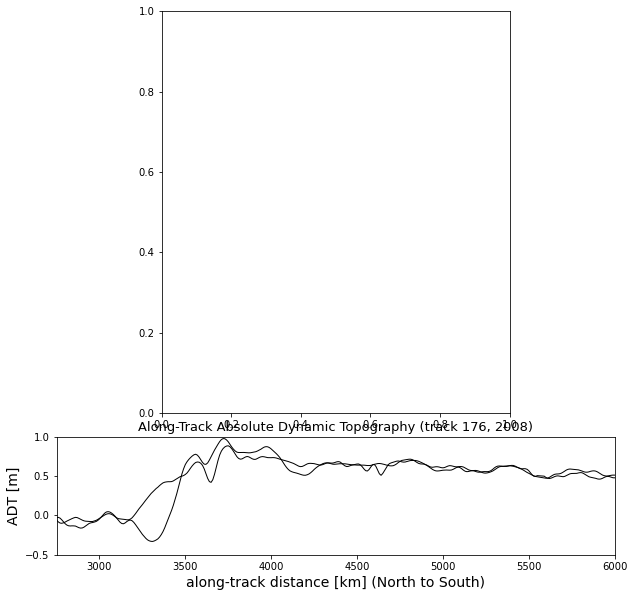

In [155]:
FFMpegWriter = ma.FFMpegWriter
writer = FFMpegWriter(fps=4.5)

lon_w = 250
lon_e = 360
lat_s = 0
lat_n = 60

time_grid = np.arange(np.int(np.nanmin(time_record[0])), np.int(np.nanmax(time_record[0])), 2*60*60)
cmap = plt.get_cmap('seismic')
cbpos = [0.93, 0.4, 0.025, 0.2]
levs = [-0.000000001, 0.000000001]
fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(4, 3, figure=fig)
ttr = []
trip = 0
with writer.saving(fig, "test_j2.mp4", 300):
    for i in tqdm(range(24*10)):
        this_time_s = time_grid[i] - (2*60*60)/2
        this_time_e = time_grid[i] + (2*60*60)/2
        
        ax = fig.add_subplot(gs[0:3, :])
        ax2 = fig.add_subplot(gs[3, :])
        
        ax.scatter(x4['lon'].values, x4['lat'].values, color='k', zorder=0, s=0.25)
        for j in range(len(track_record)):  # loop over track 
            time_in0 = np.where((time_record[j] > this_time_s) & (time_record[j] < this_time_e))[0]
            # print(time_in0)
            if len(time_in0) >= 1:
                # print(time_in0)
                ttr.append(track_record[j])
                ax.scatter(lon_record[j], lat_record[j], color='#B22222', s=4, zorder=2)
                # print(((time_record[j][time_in0] - time_record[j][0])/(60*60*24))/365)
                
                if track_record[j] == 176.0:
                    ax.scatter(lon_record[j], lat_record[j], color='#FFD700', s=5, zorder=2)
                    trip = 1
                    ax2.plot(dist[j], np.squeeze(adt[j][time_in0, :]), color='k', linewidth=1)
                    ax2.set_xlim([2750, 6000])
                    ax2.set_ylim([-.5, 1.0])
                    ax2.set_xlabel('along-track distance [km] (North to South)', fontsize=14)
                    ax2.set_ylabel('ADT [m]', fontsize=14)
                    ax2.set_title('Along-Track Absolute Dynamic Topography (track 176, 2008)', fontsize=13)
            
        # print(ttr)
        if len(ttr) > 0:
            for k in range(len(ttr)):
                ax.scatter(lon_record[np.where(track_record == ttr[k])[0][0]], \
                                  lat_record[np.where(track_record == ttr[k])[0][0]], color='#D3D3D3', s=1, zorder=1)
            if trip > 0:
                inn = np.where(track_record == np.array([176]))[0][0]
                ax.scatter(lon_record[inn][np.where((dist[inn] >= 2750) & (dist[inn] <=6000))[0]], \
                           lat_record[inn][np.where((dist[inn] >= 2750) & (dist[inn] <=6000))[0]], \
                           color='#FFD700', s=5, zorder=2)
        
        # ax = plt.gca()
        w = 1 / np.cos(np.deg2rad(np.nanmean([lat_n, lat_s])))
        ax.set_aspect(w)
        ax.set_xlim([lon_w, lon_e])
        ax.set_ylim([lat_s, lat_n])
        time_s_s = (time_grid[i] - time_record[0][0])/(60*60*24)
        ax.set_title('Jason-2 altimeter tracks, day = ' + str(np.abs(np.round(time_s_s,2))), fontsize=14)
        ax.set_xlabel('Longitude [$^{\circ}$E]', fontsize=10)
        ax.set_ylabel('Latitude [$^{\circ}$N]', fontsize=10)
        
        # cax = fig.add_axes(cbpos)
        # cb = fig.colorbar(axp, cax=cax, orientation='vertical', extend='both')
        
        writer.grab_frame()
        ax.clear()

In [153]:
np.where(track_record == np.array([176]))[0][0]

175

In [70]:
i = 20
this_time_s = time_grid[i] - 1500
this_time_e = time_grid[i] + 1500
print(time_grid[i])
for j in range(len(track_record)):  # loop over track 
    time_in0 = np.where((time_record[j] > this_time_s) & (time_record[j] < this_time_e))[0]
    if len(time_in0) > 0:
        print(track_record[j])
        print(time_record[j][time_in0[0]])

1241673843
44.0
1241673928.1292999


In [104]:
((time_record[j][time_in0] - time_record[j][0])/(60*60*24))/365

array([], dtype=float64)

In [100]:
time_record[j][time_in0] - time_record[j][0]

array([], dtype=float64)

In [109]:
len(time_in0) >= 1

False